## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import time
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# new approach for reading the api_df
df_list = []

with open('tweet-json', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df= pd.DataFrame(df_list)

## Assess

In [5]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,12,10,None,None,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
445,819227688460238848,NaN,NaN,2017-01-11 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
1159,724046343203856385,NaN,NaN,2016-04-24 01:24:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sarge. Not even he knows what his tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724046343...,10,10,Sarge,None,None,None,None
1510,691444869282295808,NaN,NaN,2016-01-25 02:17:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She likes flowers. 12/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691444869...,12,10,Bailey,None,None,None,None
567,802239329049477120,NaN,NaN,2016-11-25 19:55:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He'll do your taxes for you. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802239329...,12,10,Loki,None,None,None,puppo
720,783347506784731136,NaN,NaN,2016-10-04 16:46:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kenny. He just wants to...,6.742918e+17,4.196984e+09,2015-12-08 18:17:56 +0000,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None,None,None,None
263,842535590457499648,NaN,NaN,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,None,None,None


In [7]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitter_archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
twitter_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
twitter_archive_df[twitter_archive_df['name'].apply(len) <= 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [13]:
# View tweets with decimals in rating in 'text' column
twitter_archive_df[twitter_archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Mohamed Magdy\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [14]:
twitter_archive_df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [15]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg                                            1
https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg                                            1
https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg                                            1
https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/887343120832229379/pu/img/6HS

In [18]:
api_df.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [19]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [20]:
twitter_archive_df[twitter_archive_df.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [21]:
twitter_archive_df[twitter_archive_df['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [22]:
sum(image_predictions_df['jpg_url'].duplicated())

66

### Tidiness

- **`api_df_clean`** and **`image_predictions_clean`** need to be merged into **`twitter_archive_clean`**.
- Dog stage is in 4 columns.


### Quality

- Delete rows that will not be used.
- Delete columns that will not be used. 
- Data types of some columns need to be converted.
- Create **`prediction`** and **`confidence_level`** columns and delete **`image_prediction`**'s columns that exist in  **`twitter_archive_clean`** data frame.
- Convert the null values in **`prediction`** column into **None**.
- Decimal values in **`rating_numerator`** column.
- Tweets' **`source`** are included in the url.
- Some tweet_ids have the same jpg_url
- Some tweets have 2 different tweet_id, that are retweets.
- Fix **`rating_numerator`** and **`rating_denominator`** values that are not rating.

## Clean

In [23]:
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean= image_predictions_df.copy()
api_df_clean = api_df.copy()

### Tidiness

__Define__

Merge **`api_df_clean`** and **`image_predictions_clean`** into **`twitter_archive_clean`**.

__Code__

In [24]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=api_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [25]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

__Test__

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

__Define__

Combine **`doggo`**, **`floofer`**, **`pupper`** and **`puppo`** columns into one column **`dog_stage`**.

__Code__

In [27]:
#Some dogs has multiple stages, will concatenate them.

twitter_archive_clean.loc[twitter_archive_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1753
1,,,,puppo,23
2,,,pupper,,210
3,,floofer,,,7
4,doggo,,,,67
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [28]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

__Test__

In [29]:
twitter_archive_clean.dog_stage.value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

### Quality


__Define__

Delete rows that will not be used.

__Code__

In [30]:
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]
twitter_archive_clean = twitter_archive_clean.drop_duplicates()
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

__Test__

In [31]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None             1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64
1994



__Define__

Delete columns that will not be used.

__Code__

In [32]:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

##### Test

In [33]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'user_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

##### Define
Change data types.

##### Code

In [34]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)
twitter_archive_clean['favorite_count'] = twitter_archive_clean['favorite_count'].astype(int)
twitter_archive_clean['retweet_count'] = twitter_archive_clean['retweet_count'].astype(int)
twitter_archive_clean['user_count'] = twitter_archive_clean['user_count'].astype(int)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

##### Test

In [35]:
twitter_archive_clean.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
source                              category
text                                  object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
retweet_count                          int32
favorite_count                         int32
user_count                             int32
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2        


__Define__

Create **`prediction`** and **`confidence_level`** columns and delete **`image_prediction`**'s columns that exist in  **`twitter_archive_clean`** data frame.


__Code__

In [36]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(prediction_func, axis=1)
twitter_archive_clean['prediction'] = predictions
twitter_archive_clean['confidence_level'] = confidence_level



# Delete columns
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)


__Test__

In [37]:
twitter_archive_clean[twitter_archive_clean.prediction.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,dog_stage,prediction,confidence_level



__Define__

Convert the null values in **`prediction`** column into **None**.

__Code__

In [38]:
twitter_archive_clean.loc[twitter_archive_clean['prediction'] == 'NaN', 'prediction'] = None

__Test__

In [39]:
twitter_archive_clean[twitter_archive_clean.prediction.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,nan,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,,,,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,None,0.0
1385,684122891630342144,nan,NaN,2016-01-04 21:23:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11.0,10.0,None,...,,,,539,2176,3200952,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,None,0.0
1381,684200372118904832,nan,NaN,2016-01-05 02:30:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Gang of fearless hoofed puppers here. Straight...,https://twitter.com/dog_rates/status/684200372...,6.0,10.0,None,...,,,,1177,2394,3200860,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,None,None,0.0
1374,684567543613382656,nan,NaN,2016-01-06 02:49:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,https://twitter.com/dog_rates/status/684567543...,4.0,10.0,Bobby,...,,,,1418,3312,3200950,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,None,None,0.0
1366,684959798585110529,nan,NaN,2016-01-07 04:48:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,5.0,10.0,Jerry,...,,,,3487,7004,3200950,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,679527802031484928,nan,NaN,2015-12-23 05:03:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,https://twitter.com/dog_rates/status/679527802...,11.0,10.0,None,...,,pupper,,823,2892,3200953,https://pbs.twimg.com/media/CW4q7jDWkAA2y8g.jpg,pupper,None,0.0
1354,685667379192414208,nan,NaN,2016-01-09 03:40:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,https://twitter.com/dog_rates/status/685667379...,9.0,10.0,Marty,...,,pupper,,666,2579,3200950,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,pupper,None,0.0
1457,680176173301628928,nan,NaN,2015-12-25 00:00:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,https://twitter.com/dog_rates/status/680176173...,10.0,10.0,None,...,,pupper,,1760,4263,3200953,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,pupper,None,0.0
1478,679503373272485890,nan,NaN,2015-12-23 03:26:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,https://twitter.com/dog_rates/status/679503373...,8.0,10.0,Dwight,...,,pupper,,1673,3484,3200953,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,pupper,None,0.0


__Define__

Clean decimal values in **`rating numerators`** column.

__Code__

In [40]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [41]:
twitter_archive_clean['rating_numerator'] = ratings[0]

__Test__

In [42]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Mohamed Magdy\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,dog_stage,prediction,confidence_level
1451,680494726643068929,nan,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,...,,,,542,1879,3200953,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
558,786709082849828864,nan,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,...,,,,7069,20296,3200901,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,nan,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,...,,,,10407,46860,3200890,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
614,778027034220126208,nan,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,...,,pupper,,1885,7320,3200810,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


##### Define
Extract just the tweets' **`source`** from the url.

##### Code

In [43]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

##### Test

In [44]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,dog_stage,prediction,confidence_level
1360,685321586178670592,nan,NaN,2016-01-08 04:46:13+00:00,Twitter for iPhone,This is Rocky. He sleeps like a psychopath. 10...,https://twitter.com/dog_rates/status/685321586...,10,10.0,Rocky,...,,,,735,2910,3200950,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,None,Boston_bull,0.972483
18,888554962724278272,nan,NaN,2017-07-22 00:23:06+00:00,Twitter for iPhone,This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13,10.0,Ralphus,...,,,,3732,20290,3200889,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,None,Siberian_husky,0.700377
2006,667176164155375616,nan,NaN,2015-11-19 03:02:47+00:00,Twitter for iPhone,These are strange dogs. All have toupees. Long...,https://twitter.com/dog_rates/status/667176164...,4,10.0,None,...,,,,484,640,3201017,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,None,soft-coated_wheaten_terrier,0.318981
1620,674752233200820224,nan,NaN,2015-12-10 00:47:23+00:00,Twitter for iPhone,Everyone please just appreciate how perfect th...,https://twitter.com/dog_rates/status/674752233...,12,10.0,None,...,,,,516,1580,3201004,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,None,vizsla,0.665516
970,721001180231503872,nan,NaN,2016-04-15 15:44:11+00:00,Twitter for iPhone,This is Oliver. Bath time is upon him. His fea...,https://twitter.com/dog_rates/status/721001180...,11,10.0,Oliver,...,,pupper,,686,2748,3200945,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,pupper,Samoyed,0.950053


In [45]:
twitter_archive_clean['source'].unique()

[Twitter for iPhone, TweetDeck, Twitter Web Client]
Categories (3, object): [Twitter for iPhone, TweetDeck, Twitter Web Client]

##### Define

Fix **`rating_numerator`** and **`rating_denominator`** values that are not rating.

##### Code

In [46]:
tmp_rating = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in tmp_rating:
    x = twitter_archive_clean.text == i
#     column_1 = 'rating_numerator'
#     column_2 = 'rating_denominator'
    twitter_archive_clean.loc[x, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    twitter_archive_clean.loc[x, 'rating_denominator'] = 10

C:\Users\Mohamed Magdy\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


__Test__

In [47]:
twitter_archive_clean[twitter_archive_clean.text.isin(tmp_rating)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,dog_stage,prediction,confidence_level
1405,682962037429899265,nan,NaN,2016-01-01 16:30:13+00:00,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10.0,Darrel,...,,,,15043,26239,3200952,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,None,Chihuahua,0.155207
1295,689835978131935233,nan,NaN,2016-01-20 15:44:48+00:00,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10.0,Fynn,...,,,,850,2369,3200950,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,None,collie,0.600186
1284,690400367696297985,nan,NaN,2016-01-22 05:07:29+00:00,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10.0,Eriq,...,,,,509,2041,3200951,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,None,Pembroke,0.426459
1527,677314812125323265,nan,NaN,2015-12-17 02:30:09+00:00,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10.0,Tassy,...,,,,611,1799,3200953,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,None,Blenheim_spaniel,0.924127
1561,676191832485810177,nan,NaN,2015-12-14 00:07:50+00:00,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10.0,None,...,,,,1145,2478,3201002,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,None,Chihuahua,0.376741
1017,714258258790387713,nan,NaN,2016-03-28 01:10:13+00:00,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10.0,Travis,...,,,,808,3281,3200947,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,None,collie,0.176758
1234,694352839993344000,nan,NaN,2016-02-02 02:53:12+00:00,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10.0,Oliviér,...,,,,700,2244,3200950,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,None,Australian_terrier,0.407886
1229,695064344191721472,nan,NaN,2016-02-04 02:00:27+00:00,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10.0,None,...,,,,685,1771,3200950,https://pbs.twimg.com/ext_tw_video_thumb/69506...,None,None,0.000000
1269,691483041324204033,nan,NaN,2016-01-25 04:49:38+00:00,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10.0,None,...,,,,656,2608,3200950,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,None,bloodhound,0.886232
1139,703356393781329922,nan,NaN,2016-02-26 23:10:06+00:00,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10.0,Socks,...,,,,429,2085,3200949,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,None,Border_collie,0.894842


##### Define
Fix **`rating_numerator`** and **`rating_denominator`** columns for the group dogs' rating values.

##### Code

In [48]:
modify_df= pd.concat([twitter_archive_clean[twitter_archive_clean.rating_denominator!=10],twitter_archive_clean[twitter_archive_df['rating_numerator'] > 20]])

<ipython-input-48-17dd6a85dff5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  modify_df= pd.concat([twitter_archive_clean[twitter_archive_clean.rating_denominator!=10],twitter_archive_clean[twitter_archive_df['rating_numerator'] > 20]])


In [49]:
modify_df['rating_numerator'] = modify_df['rating_numerator'].astype(float)
modify_df['rating_denominator'] = modify_df['rating_denominator'].astype(float)

In [50]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = modify_df.rating_denominator[modify_df.rating_denominator >= 40 ]/10

# Check the dog_count with their indices:
print(dogs_count)

# Performing the Calculations
modify_df.loc[modify_df.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [modify_df.rating_numerator[modify_df.rating_numerator >= 40]/dogs_count , 10]


1380    11.0
1379    13.0
1512    12.0
1571     8.0
1131     5.0
1065     5.0
1022     9.0
1047     8.0
1207     4.0
345      7.0
924     17.0
734     15.0
Name: rating_denominator, dtype: float64


In [51]:
twitter_archive_clean=pd.concat([twitter_archive_clean,modify_df])

In [52]:
twitter_archive_clean.drop_duplicates(subset='tweet_id',keep=False,inplace=True)

##### Test

In [53]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,nan,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,...,,,,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,None,0.000000
1387,683857920510050305,nan,NaN,2016-01-04 03:50:08+00:00,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10,10.0,Sadie,...,,,,1262,4163,3200952,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,None,bluetick,0.174738
1386,684097758874210310,nan,NaN,2016-01-04 19:43:10+00:00,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10,10.0,Lupe,...,,,,1621,4515,3200952,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,None,Labrador_retriever,0.627856
1385,684122891630342144,nan,NaN,2016-01-04 21:23:02+00:00,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11,10.0,None,...,,,,539,2176,3200952,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,None,0.000000
1384,684177701129875456,nan,NaN,2016-01-05 01:00:50+00:00,Twitter for iPhone,This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10,10.0,Kulet,...,,,,764,2215,3200952,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,None,chow,0.334783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,743253157753532416,nan,NaN,2016-06-16 01:25:36+00:00,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10.0,Kilo,...,,,puppo,1366,4624,3200943,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,puppo,malamute,0.442612
847,744995568523612160,nan,NaN,2016-06-20 20:49:19+00:00,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10.0,Abby,...,,,puppo,716,3277,3200943,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,puppo,Old_English_sheepdog,0.427481
534,790946055508652032,nan,NaN,2016-10-25 16:00:09+00:00,Twitter for iPhone,This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10.0,Betty,...,,,puppo,5496,18601,3200901,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,puppo,golden_retriever,0.245773
14,889531135344209921,nan,NaN,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10.0,Stuart,...,,,puppo,2321,15359,3200889,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,puppo,golden_retriever,0.953442


__Store__

In [54]:
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1959 non-null   int64  
 1   in_reply_to_status_id  22 non-null     float64
 2   in_reply_to_user_id    22 non-null     float64
 3   timestamp              1959 non-null   object 
 4   source                 1959 non-null   object 
 5   text                   1959 non-null   object 
 6   expanded_urls          1959 non-null   object 
 7   rating_numerator       1959 non-null   float64
 8   rating_denominator     1959 non-null   float64
 9   name                   1959 non-null   object 
 10  doggo                  73 non-null     object 
 11  floofer                8 non-null      object 
 12  pupper                 210 non-null    object 
 13  puppo                  23 non-null     object 
 14  retweet_count          1959 non-null   int64  
 15  favo

# Analyzing & Visualizing Data

In [55]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1959 non-null   int64  
 1   in_reply_to_status_id  22 non-null     float64
 2   in_reply_to_user_id    22 non-null     float64
 3   timestamp              1959 non-null   object 
 4   source                 1959 non-null   object 
 5   text                   1959 non-null   object 
 6   expanded_urls          1959 non-null   object 
 7   rating_numerator       1959 non-null   float64
 8   rating_denominator     1959 non-null   float64
 9   name                   1959 non-null   object 
 10  doggo                  73 non-null     object 
 11  floofer                8 non-null      object 
 12  pupper                 210 non-null    object 
 13  puppo                  23 non-null     object 
 14  retweet_count          1959 non-null   int64  
 15  favo

In [56]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,NaN,NaN,NaN,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1,683857920510050305,NaN,NaN,2016-01-04 03:50:08+00:00,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10.0,10.0,Sadie,...,NaN,NaN,NaN,1262,4163,3200952,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,None,bluetick,0.174738
2,684097758874210310,NaN,NaN,2016-01-04 19:43:10+00:00,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10.0,10.0,Lupe,...,NaN,NaN,NaN,1621,4515,3200952,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,None,Labrador_retriever,0.627856
3,684122891630342144,NaN,NaN,2016-01-04 21:23:02+00:00,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11.0,10.0,None,...,NaN,NaN,NaN,539,2176,3200952,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,NaN,0.000000
4,684177701129875456,NaN,NaN,2016-01-05 01:00:50+00:00,Twitter for iPhone,This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10.0,10.0,Kulet,...,NaN,NaN,NaN,764,2215,3200952,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,None,chow,0.334783


In [57]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1959 entries, 2017-08-01 16:23:56+00:00 to 2016-07-07 19:16:47+00:00
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               1959 non-null   object  
 1   in_reply_to_status_id  22 non-null     float64 
 2   in_reply_to_user_id    22 non-null     float64 
 3   source                 1959 non-null   category
 4   text                   1959 non-null   object  
 5   expanded_urls          1959 non-null   object  
 6   rating_numerator       1959 non-null   float64 
 7   rating_denominator     1959 non-null   float64 
 8   name                   1959 non-null   object  
 9   doggo                  73 non-null     object  
 10  floofer                8 non-null      object  
 11  pupper                 210 non-null    object  
 12  puppo                  23 non-null     object  
 13  retweet_count          1959 non-null   int64 

## What is the most common dog?

<ipython-input-58-4b4aec5dcd63>:9: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


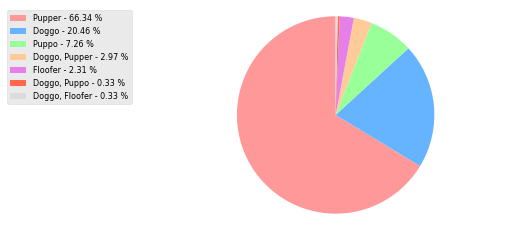

In [58]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')

- Pupper is the most common owned dog.

## What is the most common rating?

In [59]:
df_integer_ratings_14 = df[(df.rating_numerator <= 14) & (df.rating_numerator.apply(float.is_integer))]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

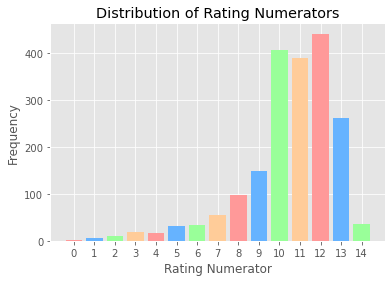

In [60]:
plt.bar(np.arange(15), subset_rating_counts, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

- Most tweets are given a rating between 10 to 13.

## What is the relation between Retweets & Likes?

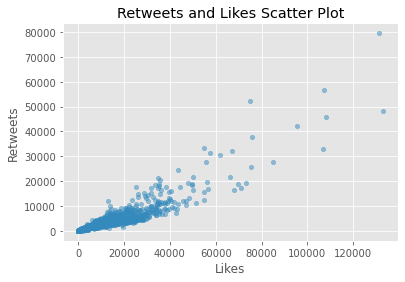

In [61]:
#Retweets vs. Likes
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)

plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

- Retweets are positively correlated with Likes.